Podsumowanie teoretyczne:

Stężenie białka Y = f(X), gdzie X jest TF lub represorem

Input function dla TF:
$ f(X) = \beta \frac{X^n}{K^n+X^n} $

Input function dla represora:
$ f(X) = \beta \frac{K^n}{K^n+X^n} $

* K - współczynnik aktywacji/represji
* $\beta$ - maksymalna aktywność promotora, gdy ów nie jest represjonowany
* n-współczynnik Hilla

Symulowany układ:
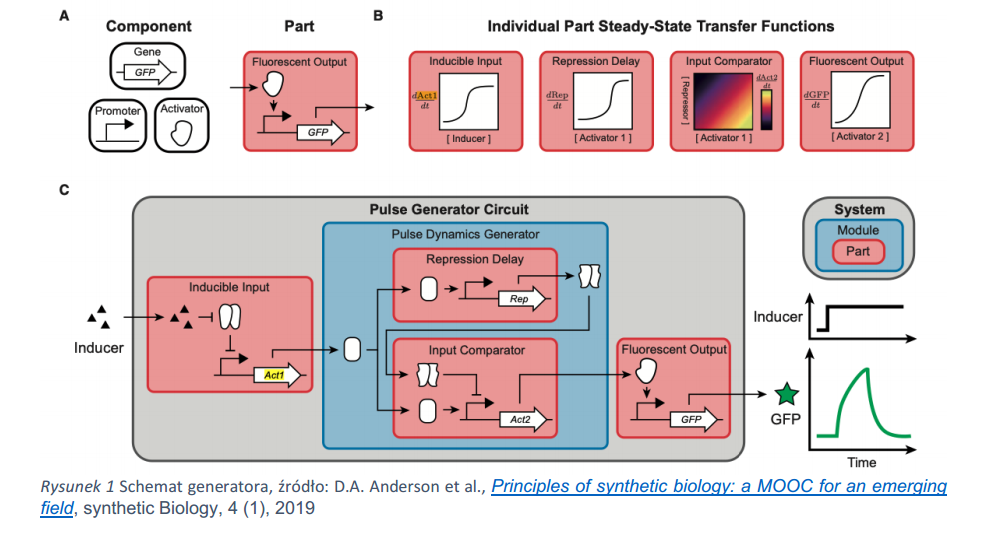

Będziemy zatem liczyć następujące stężenia:
* $X_{ind}$ - tężenie inducera
* $X_{act1}$ - stężenie aktywatora 1
* $X_{act2}$ - stężenie aktywatora 2
* $X_{rep}$ - stężenie represora
* $X_{GFP}$ - stężenie białka GFP

### Równania:
* Stężenie aktywatora 1
$$
\frac{dy X_{act1}(t)}{dt} = \beta_{ind}
$$

* Stężenie represora
$$ 
X_{rep}(t) = \beta_{act1} \frac{X_{act1}(t)^n}{K_{act1}^n+X_{act_1}(t)^n}\\
$$

* Stężenie aktywatora 2
$
X_{act2}(t) = \beta_{act1} \frac{X_{act1}(t)^n}{K_{act1}^n+X_{act_1}(t)^n}\\
X_{act2}(t) = \beta_{rep} \frac{K_{rep}^n}{K_{rep}^n+X_{rep}(t)^n}\\
$
Zatem:
$$
X_{act2}(t) = \beta_{act1} \frac{X_{act1}(t)^n}{K_{act1}^n+X_{act_1}(t)^n} + \beta_{rep} \frac{K_{rep}^n}{K_{rep}^n+X_{rep}(t)^n}
$$
* Stężenie białka GFP
$$
X_{GFP}(t) = \beta_{act2} \frac{X_{act_2}(t)^n}{K_{act_2}^n+X_{act_2}(t)^n}\\
$$

### Warunkti brzegowe:
* $ X_{rep}(0) = 0 $
* $ X_{act_2}(0) = 0 $
* $ X_{GFP}(0) = 0 $

### Proponowany układ biologioczny

Z artukułu:
Basu, Subhayu, et al. "Spatiotemporal control of gene expression with pulse-generating networks." *Proceedings of the National Academy of Sciences* 101.17 (2004): 6355-6360.

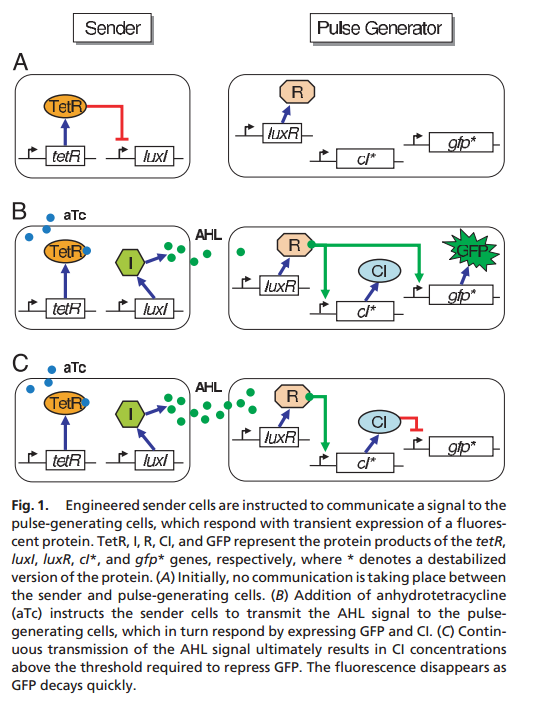

W przypadku zaprezentowanego układu:
* Inducer - TetR
* Aktywator 1 - I - acyl-homoserine lactone (AHL) pod kontrolą promotora $ P_{LtetO-1} $
* Aktywator 2 - R - zdestabilizowany represor z bakteriofaga $ \lambda $. Destabilizacja poprzez dodanie 12-a metki ssrA
* Represor - cI - zdestabilizowany represor z bakteriofaga $ \lambda $. Destabilizacja poprzez dodanie 12-a metki ssrA, kontrolowany przez promotor luxP_L
* GFP - GFP - wzbogacona cyjanowe fluoresencyje białko ECFP pod kontrolą promotora $ luxP_L $



### Rozwiązanie układu

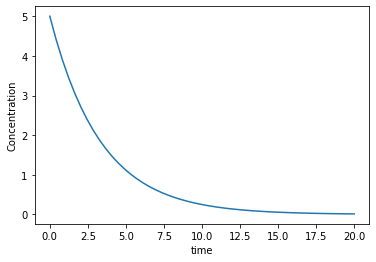

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('Concentration')
plt.show()

[[0.00000000e+00 5.60000000e-05 6.16000000e-04 6.21600000e-03
  6.22160000e-02 3.42857143e-01]
 [0.00000000e+00 5.50175439e-05 6.05192982e-04 6.10694737e-03
  6.11244912e-02 3.36842105e-01]
 [0.00000000e+00 5.50175439e-05 6.05192983e-04 6.10694738e-03
  6.11244913e-02 3.36842106e-01]
 [0.00000000e+00 2.77522124e-05 3.05274336e-04 3.08049558e-03
  3.08327080e-02 1.69911505e-01]]


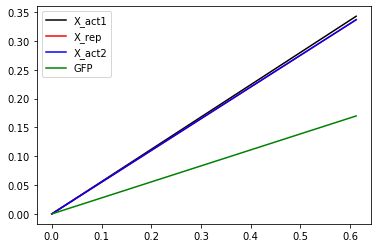

In [48]:
b_ind = 0.56
b_act1 = 0.56
K_act1 = 0.01
b_rep = 0.02
K_rep = 0.0001
b_act2 = 0.56
K_act2 = 0.01

time = np.linspace(0,30)

def model (t, y):
    X_act1 = b_ind
    X_rep = b_act1 * X_act1 / (K_act1 + X_act1)
    X_act2 = b_act1 * X_act1 / (K_act1 + X_act1) + b_rep * K_rep**2 / (K_rep**2 + X_rep**2)
    X_GFP = b_act2 * X_act2 / (b_act2 + X_act2)
    return [X_act1,
           X_rep,
           X_act2,
           X_GFP]

solver = solve_ivp(model, time, [0, 0, 0, 0])

print(solver.y)
t = solver.t
X_act1, X_rep, X_act2, X_GFP = solver.y

plt.figure(1)
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(t, X_act1, 'k-', label='X_act1', color='black')
ax.plot(t, X_rep, 'k-', label='X_rep', color='red')
ax.plot(t, X_act2, 'k-', label='X_act2', color='blue')
ax.plot(t, X_GFP, 'k-', label='GFP', color='green')
ax.legend(loc='best')